<a href="https://colab.research.google.com/github/salmonin-o3o/ESAA_study/blob/main/250512_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝 파이토치 교과서

## 2.4 파이토치 코드 맛보기

파이토치를 사용하여 간단한 분류 및 회귀 모델을 개발하는 방법을 살펴보자.

In [1]:
!pip install --upgrade matplotlib --use-feature=2020-resolver
!pip install --upgrade seaborn --use-feature=2020-resolver
!pip install --upgrade scikit-learn --use-feature=2020-resolver


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [opti

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/25-1/car_evaluation.csv')
dataset.head()

Mounted at /content/drive


,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


컴퓨터는 인간의 언어인 단어를 인식할 수 없기 때문에 단어를 벡터로 바꾸어 주는 임베딩 처리가 필요하다.

<Axes: ylabel='count'>

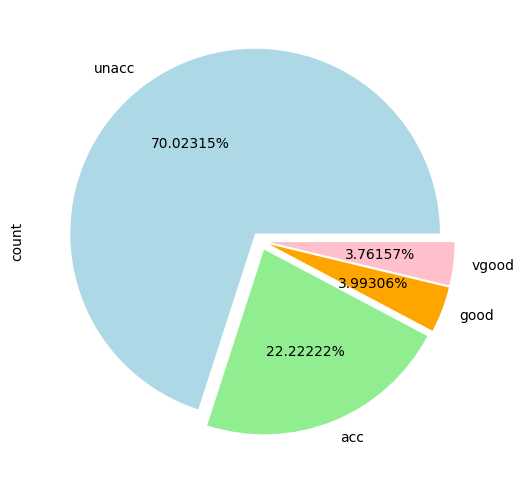

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%',
                                   colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

이제 데이터에 대한 전처리를 해보자.

딥러닝은 통계 알고리즘을 기반으로 하기 때문에 단어를 숫자(텐서)로 변환해야 한다.

주어진 데이터의 형태를 파악한 후, 숫자로 변환해 주어야 한다.

astpye() 메서드를 이용하여 범주 특성을 갖는 데이터를 범주형 타입으로 변환한다. 또한, 이것을 텐서로 변환한다.

In [5]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
  dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

범주형 데이터를 텐서로 변환하기 위해 다음과 같은 절차가 필요하다.

범주형 데이터->dataset->넘파이 배열->텐서

범주형 데이터(단어)를 숫자(넘파이 배열)로 변환하기 위해 cat.codes를 시용합니다. cat.codes는 어떤 클래스가 어떤 숫자로 매핑되어 있는지 확인이 어려운 단점이 있으므로 주의해서 사용해야한다.

+) np.stack과 np.concatenate
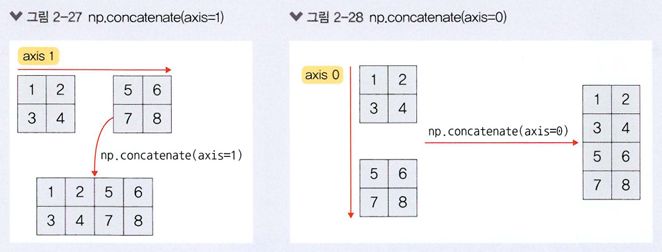

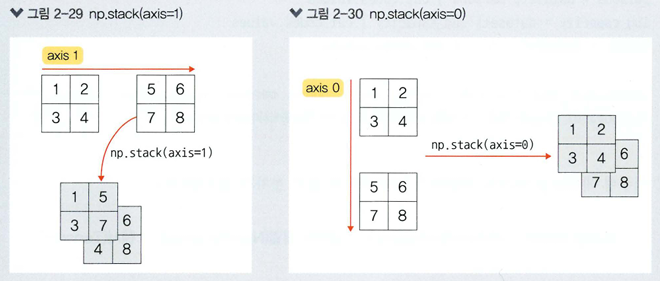

In [6]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [7]:
# 레이블(outputs)로 사용할 칼럼에 대해서도 텐서로 변환
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


+) ravel(), reshape(-1), flatten()을 사용하면 2차원 텐서가 1차원으로 변경되어 출력된다.

워드 임베딩은 유사한 단어끼리 유사하게 인코딩되도록 표현하는 방법이다. 또한 높은 차원의 임베딩일수록 단어 간의 세부적인 관계를 잘 파악할 수 있다. 따라서 단일 숫자로 변환된 넘파이 배열을 N차원으로 변경하여 사용한다.


In [8]:
# 범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


다음은 (모든 범주형 칼럼의 고유값 수, 차원의 크기) 형태의 배열을 출력한 결과이다.

In [9]:
# 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2) # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [10]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


데이터 준비가 끝났으므로, 모델의 네트워크를 생성한다.

In [11]:
# 모델의 네트워크 생성
class Model(nn.Module): # 클래스 형태로 구현되는 모델은 nn.Module을 상속받음.
  def __init__(self, embedding_size, output_size, layers, p=0.4): # 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사ㅛㅇ.
                                                                  # self: 자기 자신을 의미, p: 드롭아웃
    super().__init__() # 부모 클래스(nn.Module)에 접근할 때 사용.
    self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
    self.embedding_dropout = nn.Dropout(p)

    all_layers = []
    num_categorical_cols = sum((nf for ni, nf in embedding_size))
    input_size = num_categorical_cols

    for i in layers: # for 문을 이용하여 각 계층을 all_layers 목록에 추가
      all_layers.append(nn.Linear(input_size, i)) # 선형 계층: 선형 변환을 진행
      all_layers.append(nn.ReLU(inplace=True)) # 활성화 함수로 사용
      all_layers.append(nn.BatchNorm1d(i)) # 배치 정규화 용도로 사용
      all_layers.append(nn.Dropout(p)) # 과적합 방지에 사용
      input_size = i

    all_layers.append(nn.Linear(layers[-1], output_size))
    self.layers = nn.Sequential(*all_layers)

  def forward(self, x_categorical): # 학습 데이터를 입력받아서 연산을 진행.
    embeddings = []
    for i, e in enumerate(self.all_embeddings):
      embeddings.append(e(x_categorical[:, i]))
    x = torch.cat(embeddings, 1)
    x = self.embedding_dropout(x)
    x = self.layers(x)
    return x

모델 훈련을 위해 앞에서 정의했떤 Model 클래스의 객체를 생성.

In [12]:
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)# 모델에 대한 구조(네트워크)를 보여줌.

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [13]:
# 모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [14]:
# CPU/GPU 사용 지정
if torch.cuda.is_available():
  device = torch.device('cuda') # GPU가 있다면 GPU를 사용
else:
  device = torch.device('cpu') # GPU가 없다면 CPU를 사용

In [16]:
# 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs): # for 문은 500회 반복되며, 각 반복마다 손실 함수가 오차를 계산
  i += 1
  y_pred = model(categorical_train_data).to(device)
  single_loss = loss_function(y_pred, train_outputs)
  aggregated_losses.append(single_loss) # 반복할 때마다 오차를 aggregated_losses에 추가

  if i%25 == 1:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

  optimizer.zero_grad()
  single_loss.backward() # 가중치를 업데이트하기 위해 손실 함수의 backward() 메서드 호출
  optimizer.step() # 옵티마이저 함수의 step() 메서드를 이용하여 기울기 업데이트

print(f'epoch {i:3} loss: {single_loss.item():10.10f}') # 오차가 25 에포크마다 출력


epoch:   1 loss: 1.58188987
epoch:  26 loss: 1.34836841
epoch:  51 loss: 1.26200628
epoch:  76 loss: 1.15945840
epoch: 101 loss: 1.06086147
epoch: 126 loss: 0.92762190
epoch: 151 loss: 0.84344357
epoch: 176 loss: 0.75479531
epoch: 201 loss: 0.70304167
epoch: 226 loss: 0.64962244
epoch: 251 loss: 0.64319962
epoch: 276 loss: 0.61762762
epoch: 301 loss: 0.61143345
epoch: 326 loss: 0.59980667
epoch: 351 loss: 0.59709316
epoch: 376 loss: 0.57575810
epoch: 401 loss: 0.57915127
epoch: 426 loss: 0.57882553
epoch: 451 loss: 0.57249534
epoch: 476 loss: 0.56930351
epoch 500 loss: 0.5776255727


In [17]:
# 테스트 데이터셋으로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
  y_val = model(categorical_test_data)
  loss = loss_function(y_val, test_outputs)
print(f'loss: {loss:.8f}')

loss: 0.56802684


과적합은 발생하지 않았다.

In [18]:
# 모델의 예측 확인
print(y_val[:5])

tensor([[ 3.1327,  1.9689, -4.6646, -4.1045],
        [ 3.1480,  2.1038, -3.5846, -3.3305],
        [ 2.3661,  1.4804, -3.1397, -2.9389],
        [ 2.6919,  1.2816, -3.1704, -2.8534],
        [ 3.4878,  2.2145, -3.9125, -3.5350]])


In [19]:
# 가장 큰 값을 갖는 인덱스 확인
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [20]:
# 테스트 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[259   0]
 [ 86   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.00      0.00      0.00        86

    accuracy                           0.75       345
   macro avg       0.38      0.50      0.43       345
weighted avg       0.56      0.75      0.64       345

0.7507246376811594


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


딥러닝 분류 모델의 성능 평가 지표를 알아보자. 성능 평가 지표로 정확도, 재현율, 정밀도, F1-스코어가 있다.

**정확도**
전체 예측 건수에서 정답을 맞친 건수의 비율

**재현율**
실제로 정답이 1이라고 할 때 모델도 1로 예측한 비율

**정밀도**
모델이 1이라고 예측한 것 중에서 실제로 정답이 1인 비율

**F1-스코어**
일반적으로 정밀도와 재현율은 트레이드오프 관계이다. 이 문제를 해결하려고 정밀도 재현율의 조화 평균을 이용한 것이 F1-스코어 평가이다.